In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("mbti_1.csv")

In [3]:
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [4]:
df["IE"]=df.apply(lambda type_:type_['type'][0],axis=1)
df["NS"]=df.apply(lambda type_:type_['type'][1],axis=1)
df["TF"]=df.apply(lambda type_:type_['type'][2],axis=1)
df["JP"]=df.apply(lambda type_:type_['type'][3],axis=1)

df.head()

,type,posts,IE,NS,TF,JP
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,I,N,F,J
1,ENTP,'I'm finding the lack of me in these posts ver...,E,N,T,P
2,INTP,'Good one _____ https://www.youtube.com/wat...,I,N,T,P
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",I,N,T,J
4,ENTJ,'You're fired.|||That's another silly misconce...,E,N,T,J


In [5]:
from collections import Counter
Counter(list(df.type))

Counter({'INFJ': 1470,
         'ENTP': 685,
         'INTP': 1304,
         'INTJ': 1091,
         'ENTJ': 231,
         'ENFJ': 190,
         'INFP': 1832,
         'ENFP': 675,
         'ISFP': 271,
         'ISTP': 337,
         'ISFJ': 166,
         'ISTJ': 205,
         'ESTP': 89,
         'ESFP': 48,
         'ESTJ': 39,
         'ESFJ': 42})

In [6]:
print(dict(Counter(list(df.IE))))
print(dict(Counter(list(df.NS))))
print(dict(Counter(list(df.TF))))
print(dict(Counter(list(df.JP))))

{'I': 6676, 'E': 1999}
{'N': 7478, 'S': 1197}
{'F': 4694, 'T': 3981}
{'J': 3434, 'P': 5241}


<AxesSubplot:xlabel='JP', ylabel='count'>

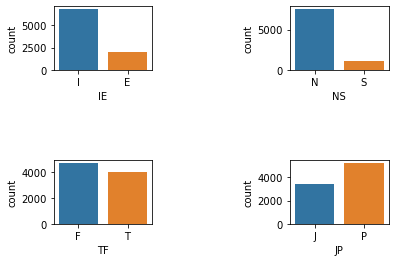

In [7]:
plt.subplot(331)
sns.countplot(x='IE',data=df)
plt.subplot(333)
sns.countplot(x='NS',data=df)
plt.subplot(337)
sns.countplot(x='TF',data=df)
plt.subplot(339)
sns.countplot(x='JP',data=df)

In [8]:
from scipy.stats import chi2_contingency
for a in range(0,4):
    for b in range(a+1,4):
        df_2=df[["IE",'NS','TF',"JP"]]
        df_3=pd.crosstab(df_2[["IE",'NS','TF',"JP"][a]],df_2[["IE",'NS','TF',"JP"][b]])
        print(df_3)
        print(f'Between {["IE","NS","TF","JP"][a]} and {["IE","NS","TF","JP"][b]}, if ChiSqResult P<=0.05: {(chi2_contingency(df_3)[1])<=0.05}\n\n')

NS     N    S
IE           
E   1781  218
I   5697  979
Between IE and NS, if ChiSqResult P<=0.05: True


TF     F     T
IE            
E    955  1044
I   3739  2937
Between IE and TF, if ChiSqResult P<=0.05: True


JP     J     P
IE            
E    502  1497
I   2932  3744
Between IE and JP, if ChiSqResult P<=0.05: True


TF     F     T
NS            
N   4167  3311
S    527   670
Between NS and TF, if ChiSqResult P<=0.05: True


JP     J     P
NS            
N   2982  4496
S    452   745
Between NS and JP, if ChiSqResult P<=0.05: False


JP     J     P
TF            
F   1868  2826
T   1566  2415
Between TF and JP, if ChiSqResult P<=0.05: False




In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(stop_words='english',max_df=0.9,min_df=0.2)
X=vectorizer.fit_transform(df.posts)
df_2=pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())
df=df.join(df_2,rsuffix="tf_idf").drop(["posts"],axis=1)

In [10]:
X=df[df.columns[5:]]
outcome=df["IE"]=="I"

import statsmodels.api as sm
model=sm.Logit(outcome, X).fit()
result=pd.DataFrame(np.array([model.pvalues.array,model.params.array]).T,columns=["p_value",'coef'],index=model.pvalues.index)

Optimization terminated successfully.
         Current function value: 0.328564
         Iterations 7


In [11]:
print(f"The words that related to Extroversion most are {list(result[result['p_value']<0.05].sort_values(['coef']).index[:20])}")
print()
print(f"The words that related to Introversion most are {list(result[result['p_value']<0.05].sort_values(['coef'],ascending=False).index[:20])}")

The words that related to Extroversion most are ['enfp', 'entp', 'entj', 'enfj', 'ne', 'fun', 'working', 'friends', 'tell', 'questions', 'let', 'sound', 'guy', 'share', 'mom', 'definitely', 'new', 'poststf_idf', 'having', 'guys']

The words that related to Introversion most are ['infp', 'infj', 'intp', 'intj', 'small', 'isfp', 'family', 'try', 'ni', 'infps', 'isfj', 'watching', 'watch', 'mind', 'asking', 'difficult', 'hate', 'istp', 'heard', 'haven']


In [12]:
X=df[df.columns[5:]]
outcome=df["NS"]=="N"

import statsmodels.api as sm
model=sm.Logit(outcome, X).fit()
result=pd.DataFrame(np.array([model.pvalues.array,model.params.array]).T,columns=["p_value",'coef'],index=model.pvalues.index)

Optimization terminated successfully.
         Current function value: 0.233680
         Iterations 8


In [13]:
print(f"The words that related to Sensing most are {list(result[result['p_value']<0.05].sort_values(['coef']).index[:20])}")
print()
print(f"The words that related to Intuition most are {list(result[result['p_value']<0.05].sort_values(['coef'],ascending=False).index[:20])}")

The words that related to Sensing most are ['isfp', 'istp', 'isfj', 'istj', 'haven', 'personality', 'fit', 'prefer', 'types', 'aren', 'sounds', 'talk', 'feelings', 'means', 'pretty', 'relate', 'fun', 'usually', 'stuff', 'typetf_idf']

The words that related to Intuition most are ['intj', 'infp', 'infj', 'intp', 'infps', 'enfp', 'human', 'entp', 'world', 'times', 'share', 'writing', 'enfj', 'problems', 'head', 'idea', 'ideas', 'used', 'figure', 'strong']


In [14]:
X=df[df.columns[5:]]
outcome=df["TF"]=="T"

import statsmodels.api as sm
model=sm.Logit(outcome, X).fit()
result=pd.DataFrame(np.array([model.pvalues.array,model.params.array]).T,columns=["p_value",'coef'],index=model.pvalues.index)

Optimization terminated successfully.
         Current function value: 0.354928
         Iterations 7


In [15]:
print(f"The words that related to Feeling most are {list(result[result['p_value']<0.05].sort_values(['coef']).index[:20])}")
print()
print(f"The words that related to Thinking most are {list(result[result['p_value']<0.05].sort_values(['coef'],ascending=False).index[:20])}")

The words that related to Feeling most are ['infp', 'infj', 'enfp', 'infps', 'feel', 'love', 'isfj', 'isfp', 'feeling', 'deep', 'wish', 'song', 'youtube', 'enfj', 'felt', 'kind', 'totally', 'happy', 'relate', 'true']

The words that related to Thinking most are ['intp', 'intj', 'entp', 'female', 'istj', 'entj', 'istp', 'emotions', 'wrong', 'point', 'problem', 'interesting', 'care', 'enjoy', 'fun', 'depends', 'explain', 'mother', 'does', 'guess']


In [16]:
X=df[df.columns[5:]]
outcome=df["JP"]=="J"

import statsmodels.api as sm
model=sm.Logit(outcome, X).fit()
result=pd.DataFrame(np.array([model.pvalues.array,model.params.array]).T,columns=["p_value",'coef'],index=model.pvalues.index)

Optimization terminated successfully.
         Current function value: 0.433370
         Iterations 7


In [17]:
print(f"The words that related to Perceiving most are {list(result[result['p_value']<0.05].sort_values(['coef']).index[:20])}")
print()
print(f"The words that related to Judging most are {list(result[result['p_value']<0.05].sort_values(['coef'],ascending=False).index[:20])}")

The words that related to Perceiving most are ['intp', 'infp', 'entp', 'enfp', 'ne', 'istp', 'infps', 'isfp', 'live', 'ideas', 'god', 'fun', 'different', 'came', 'sound', 'thought', 'started', 'pretty', 'crazy', 'com']

The words that related to Judging most are ['infj', 'intj', 'ni', 'isfj', 'enfj', 'entj', 'close', 'istj', 'coming', 'asking', 'group', 'seeing', 'comes', 'problems', 'head', 'help', 'make', 'eyes', 'post', 'http']


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
df=pd.read_csv("mbti_1.csv")
vectorizer=TfidfVectorizer(stop_words='english',max_df=0.9,min_df=0.2)
X=vectorizer.fit_transform(df.posts)
df_2=pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())
df=df.join(df_2,rsuffix="tf_idf").drop(["posts"],axis=1)

In [19]:
from scipy.stats import pearsonr

(array([  2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,
          7.,   4.,   3.,   1.,   7.,   7.,  11.,  10.,  14.,  18.,  20.,
         20.,  30.,  34.,  43.,  55.,  55.,  60.,  64.,  80.,  72.,  95.,
         98., 112., 121., 110., 122., 110., 124., 112., 116., 134., 129.,
        128., 125., 126., 112., 108., 110., 132., 108.,  97., 110.,  99.,
        104., 107.,  95.,  89.,  79., 103.,  82.,  75.,  49.,  65.,  57.,
         66.,  55.,  51.,  53.,  56.,  41.,  40.,  41.,  36.,  30.,  40.,
         28.,  21.,  20.,  17.,  13.,  31.,  15.,  16.,  16.,  16.,  16.,
         15.,  13.,  10.,   5.,   6.,   8.,   7.,   7.,   6.,   3.,   4.,
          3.]),
 array([-3.  , -2.94, -2.88, -2.82, -2.76, -2.7 , -2.64, -2.58, -2.52,
        -2.46, -2.4 , -2.34, -2.28, -2.22, -2.16, -2.1 , -2.04, -1.98,
        -1.92, -1.86, -1.8 , -1.74, -1.68, -1.62, -1.56, -1.5 , -1.44,
        -1.38, -1.32, -1.26, -1.2 , -1.14, -1.08, -1.02, -0.96, -0.9 ,
        -0.84, -0.78, -0.72, -0.66

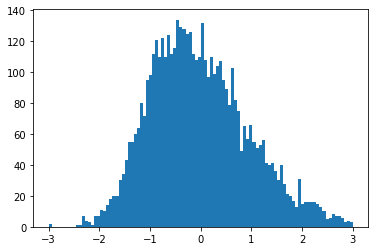

In [20]:
data=df.loc[np.logical_or(df['type']=="ENFP",df['type']=="INFP")].drop('type',axis=1)
result_stat=[]
result_p=[]
for _ in range(5000):
    sample=data.sample(40,axis=1)
    stat, p = pearsonr(sample.iloc[0],sample.iloc[1])
    result_stat.append(stat)

result_stat=np.array(result_stat)
result_p=np.array(result_p)
plt.hist((result_stat-result_stat.mean())/result_stat.std(),bins=100,range=(-3,3))
